<a href="https://colab.research.google.com/github/Korniev/Data-Sciense/blob/main/hw_09/hw_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

##Завантаження та підготовка даних

Перше, з чого нам потрібно почати – це завантажити датасет Fashion MNIST. Він доступний безпосередньо через Keras. Імпортуємо бібліотеки:

In [276]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras import optimizers

Завантажимо датасет і подивимось на його вміст:

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

Після завантаження нам потрібно нормалізувати дані. Це зробить процес навчання мережі більш ефективним. Тобто будуть дані в діапазоні від 0 до 1.

In [3]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

Так як в нас датасет mnist, по ідеї він повинен мати зображення розміром 28 х 28. Давайте це перевіримо:

In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


##Побудова моделі

Окей, супер. Зараз в нас вже є завантажений нормалізований датасет. Тепер ми вже можемо створити нашу модель. Ми почнемо з простої моделі і поступово будемо додавати шари(якщо це буде потрібно) та експериментувати з гіперпараметрами.

In [393]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax'),
])

In [394]:
model.summary()

Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_89 (Flatten)        (None, 784)               0         
                                                                 
 dense_264 (Dense)           (None, 256)               200960    
                                                                 
 dropout_38 (Dropout)        (None, 256)               0         
                                                                 
 dense_265 (Dense)           (None, 128)               32896     
                                                                 
 dense_266 (Dense)           (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Перед тренуванням моделі нам її потрібно скомпілювати. Це включає вибір оптимізатора, функції втрат і метрик для оцінки.

In [395]:
model.compile(optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Тепер ми можемо навчати модель, використовуючи тренувальні дані:

In [396]:
history = model.fit(x_train, y_train, epochs=15, batch_size=100, validation_split=0.2)

Epoch 1/15
480/480 [==============================] - 5s 9ms/step - loss: 0.6159 - accuracy: 0.7862 - val_loss: 0.4172 - val_accuracy: 0.8493
Epoch 2/15
480/480 [==============================] - 5s 11ms/step - loss: 0.4064 - accuracy: 0.8536 - val_loss: 0.3809 - val_accuracy: 0.8626
Epoch 3/15
480/480 [==============================] - 4s 8ms/step - loss: 0.3640 - accuracy: 0.8676 - val_loss: 0.3596 - val_accuracy: 0.8673
Epoch 4/15
480/480 [==============================] - 4s 9ms/step - loss: 0.3383 - accuracy: 0.8765 - val_loss: 0.3341 - val_accuracy: 0.8783
Epoch 5/15
480/480 [==============================] - 5s 11ms/step - loss: 0.3202 - accuracy: 0.8807 - val_loss: 0.3316 - val_accuracy: 0.8801
Epoch 6/15
480/480 [==============================] - 4s 8ms/step - loss: 0.3048 - accuracy: 0.8858 - val_loss: 0.3337 - val_accuracy: 0.8758
Epoch 7/15
480/480 [==============================] - 4s 9ms/step - loss: 0.2928 - accuracy: 0.8920 - val_loss: 0.3058 - val_accuracy: 0.8881
Epoc

Давайте візуалізуємо отримані дані шляхом відображення отриманих результатів на графіках

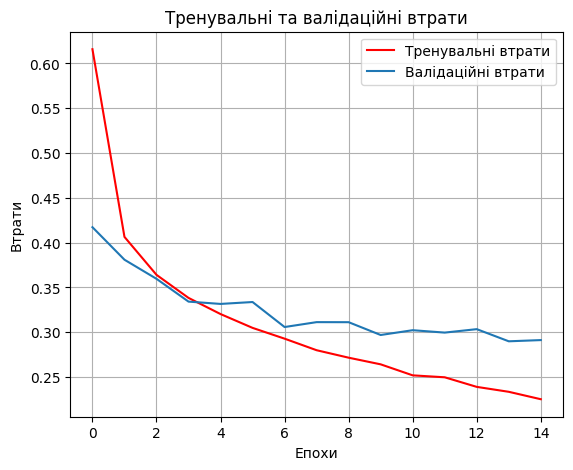

In [397]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

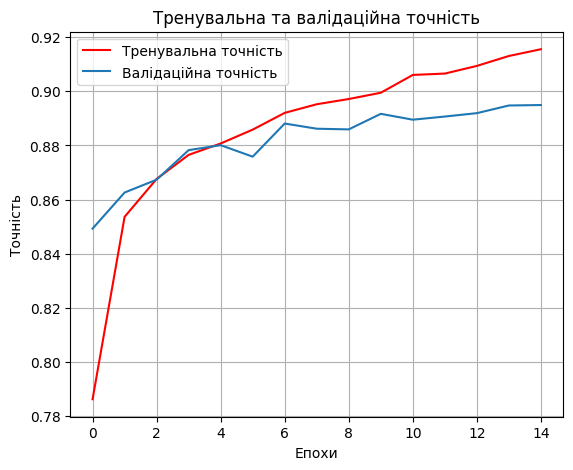

In [398]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()